In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# clustering

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

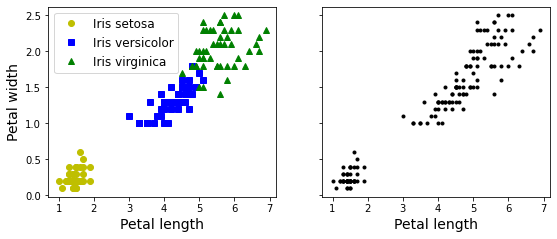

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

# save_fig("classification_vs_clustering_plot")
plt.show()

## K-means

In [4]:
from sklearn.datasets import make_blobs

In [5]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) # The standard deviation of the clusters which is passed to cluster_std

In [6]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


In [7]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

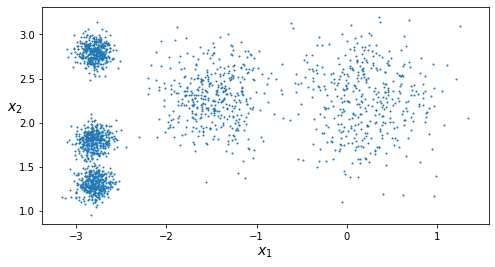

In [8]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
# save_fig("blobs_plot")
plt.show()

In [9]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [10]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [11]:
y_pred is kmeans.labels_

True

In [12]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [13]:
kmeans.labels_.shape, X.shape # ig it tells 

((2000,), (2000, 2))

In [14]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

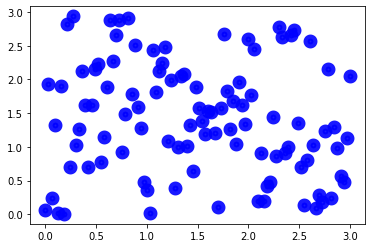

In [15]:
# decision boundaries
a = np.array([[1,50],[30,40]])
a.min(axis=0)
# X
kmeans.cluster_centers_
x = np.linspace(0,3,100)
y = 3*np.random.rand(100)
plt.scatter(x,y, color='b', marker='o',s=35, linewidths=8,zorder=10, alpha=0.9)

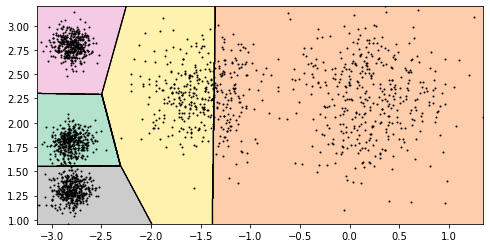

In [16]:
def plot_datam(X):
    plt.plot(X[:,0], X[:,1], 'k.', markersize=2)

def plot_decision_boundarym(clusterer, X):
    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    x0, x1 = np.meshgrid(np.linspace(mins[0], maxs[1],1000),
                             np.linspace(mins[1], maxs[1],1000))
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clusterer.predict(X_new)
    # extent is new here
    plt.contourf(y_pred.reshape(x0.shape),extent=(mins[0], maxs[0], mins[1], maxs[1]),cmap="Pastel2")
    plt.contour(y_pred.reshape(x0.shape),extent=(mins[0], maxs[0], mins[1], maxs[1]),linewidths=1, colors='k')
    plot_datam(X)
    
plt.figure(figsize=(8,4))
plot_decision_boundarym(kmeans,X)
    
    
  
    
    


In [17]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

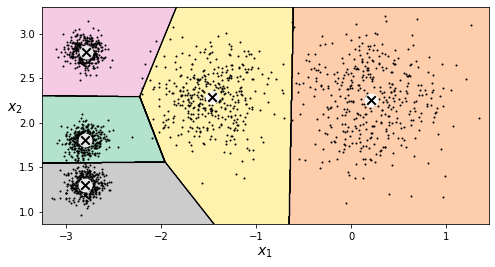

In [18]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
# save_fig("voronoi_plot")
plt.show()

In [19]:
# Instead of assigning each instance to a single cluster, which is called hard clustering, it
# can be useful to just give each instance a score per cluster: this is called soft clustering.
# For example, the score can be the distance between the instance and the centroid, or
# conversely it can be a similarity score (or affinity) such as the Gaussian Radial Basis
# Function (introduced in Chapter 5).
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
# gives the distance from each cluster
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [20]:
# Yet another important variant of the K-Means algorithm was proposed in a 2010
# paper by David Sculley.6 Instead of using the full dataset at each iteration, the algorithm
# is capable of using mini-batches, moving the centroids just slightly at each iteration.
# This speeds up the algorithm typically by a factor of 3 or 4 and makes it
# possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements
# this algorithm in the MiniBatchKMeans class. You can just use this class like the
# KMeans class:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [21]:
kmeans.labels_.shape, kmeans

((2000,), KMeans(n_clusters=5, random_state=42))

In [26]:
# It is called the model’s inertia: this is the mean squared distance
# between each instance and its closest centroid.
print(kmeans.inertia_)

# The score() method returns the negative inertia. Why negative? Well, it is because a
# predictor’s score() method must always respect the "great is better" rule.
kmeans.score(X)

211.5985372581684


-211.5985372581684

In [22]:
# This technique for choosing the best value for the number of clusters is rather coarse.
# A more precise approach (but also more computationally expensive) is to use the silhouette
# score, which is the mean silhouette coefficient over all the instances. An instance’s
# silhouette coefficient is equal to (b – a) / max(a, b) where a is the mean distance
# to the other instances in the same cluster (it is the mean intra-cluster distance), and b
# is the mean nearest-cluster distance, that is the mean distance to the instances of the
# next closest cluster (defined as the one that minimizes b, excluding the instance’s own
# cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to
# +1 means that the instance is well inside its own cluster and far from other clusters,
# while a coefficient close to 0 means that it is close to a cluster boundary, and finally a
# coefficient close to -1 means that the instance may have been assigned to the wrong
# cluster. To compute the silhouette score, you can use Scikit-Learn’s silhou
# ette_score() function, giving it all the instances in the dataset, and the labels they
# were assigned:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [28]:
# for plotting
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

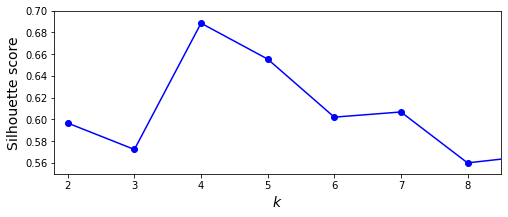

In [31]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
# save_fig("silhouette_score_vs_k_plot")
plt.show()
# As you can see, this visualization is much richer than the previous one: in particular,
# although it confirms that k=4 is a very good choice, it also underlines the fact that
# k=5 is quite good as well, and much better than k=6 or 7. This was not visible when
# comparing inertias.

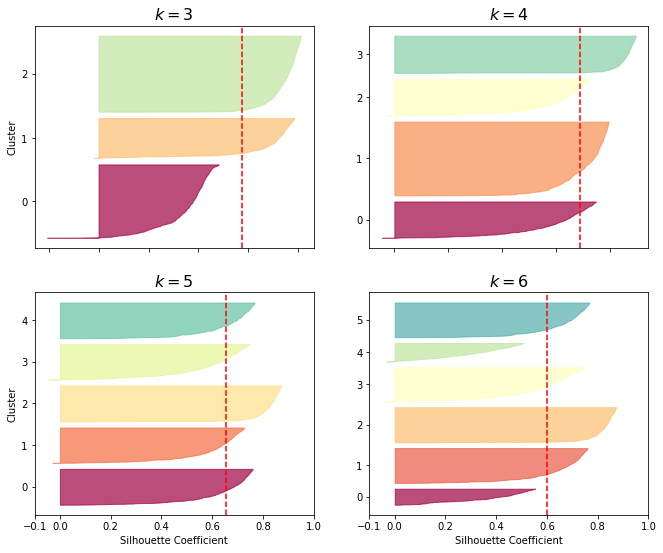

In [34]:
# An even more informative visualization is obtained when you plot every instance’s
# silhouette coefficient, sorted by the cluster they are assigned to and by the value of the
# coefficient. This is called a silhouette diagram

from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

In [ ]:
# The vertical dashed lines represent the silhouette score for each number of clusters.
# When most of the instances in a cluster have a lower coefficient than this score (i.e., if
# many of the instances stop short of the dashed line, ending to the left of it), then the
# cluster is rather bad since this means its instances are much too close to other clusters
# We can see that when k=3 and when k=6, we get bad clusters. But when k=4 or
# k=5, the clusters look pretty good – most instances extend beyond the dashed line, to
# the right and closer to 1.0. When k=4, the cluster at index 1 (the third from the top),
# is rather big, while when k=5, all clusters have similar sizes, so even though the overall
# silhouette score from k=4 is slightly greater than for k=5, it seems like a good idea
# to use k=5 to get clusters of similar sizes.

In [36]:
# DBSCAN
# This algorithm defines clusters as continuous regions of high density.

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [37]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [53]:
dbscan.labels_[:10]
# Notice that some instances have a cluster index equal to -1: this means that they are
# considered as anomalies by the algorithm. The indices of the core instances are available
# in the core_sample_indices_ instance variable, and the core instances themselves
# are available in the components_ instance variable:

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [40]:
len(dbscan.core_sample_indices_)

808

In [41]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [42]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [44]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [45]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [46]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

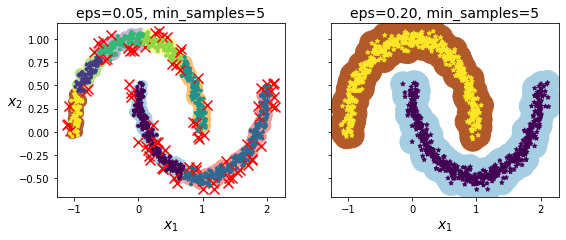

In [52]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

# save_fig("dbscan_plot")
plt.show()


In [54]:
# Somewhat surprisingly, the DBSCAN class does not have a predict() method,
# although it has a fit_predict() method. In other words, it cannot predict which
# cluster a new instance belongs to. The rationale for this decision is that several classification
# algorithms could make sense here, and it is easy enough to train one, for
# example a KNeighborsClassifier:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
# Now, given a few new instances, we can predict which cluster they most likely belong
# to, and even estimate a probability for each cluster. Note that we only trained them on
# the core instances, but we could also have chosen to train them on all the instances,
# or all but the anomalies: this choice depends on the final task.

KNeighborsClassifier(n_neighbors=50)

In [55]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([6, 0, 3, 2], dtype=int64)

In [56]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
# save_fig("cluster_classification_plot")
plt.show()